<a href="https://colab.research.google.com/github/srinijalanda93/ComputerVision/blob/main/lab8_cv_2448526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Image & Noise Removal

Use OpenCV (cv2.imread()) or PIL (Image.open()) to load the image.

Apply noise removal techniques such as Gaussian Blur, Median Filtering, or Non-Local Means Denoising.

##Edge Detection

Use edge detection methods like Sobel, Prewitt, Canny, or Laplacian.

Horizontal, Vertical & Combined Edges

Use Sobel filters (cv2.Sobel()) to extract horizontal (dx=1, dy=0) and vertical (dx=0, dy=1) edges.

Combine both using cv2.addWeighted() or cv2.magnitude().

##Fourier Transform on Boundary Points

Extract boundary points using cv2.findContours().

Apply Discrete Fourier Transform (DFT) using numpy.fft.fft().

Reconstruction Using Selected Fourier Coefficients

Select a subset of Fourier coefficients and reconstruct the shape using inverse FFT (numpy.fft.ifft()).

Fourier Descriptors for Scale, Translation, and Rotation Invariance

Explain how normalization of Fourier descriptors makes them invariant to transformations.

##Applications of FFT

Some applications include:

Image compression (JPEG uses DCT, which is related to FFT)

Signal processing (audio & speech analysis)

Feature extraction in computer vision

Pattern recognition

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:


def load_and_denoise_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, denoised_image

def edge_detection(image):
    edges_canny = cv2.Canny(image, 100, 200)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    combined_edges = cv2.magnitude(sobelx, sobely)
    return edges_canny, sobelx, sobely, combined_edges

def fourier_transform_on_boundary(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)[:, 0, :]
    complex_contour = contour[:, 0] + 1j * contour[:, 1]
    fourier_coeffs = np.fft.fft(complex_contour)
    return fourier_coeffs, contour

def reconstruct_boundary(fourier_coeffs, num_coeffs):
    truncated_coeffs = np.zeros_like(fourier_coeffs)
    truncated_coeffs[:num_coeffs] = fourier_coeffs[:num_coeffs]
    reconstructed_contour = np.fft.ifft(truncated_coeffs)
    return reconstructed_contour.real, reconstructed_contour.imag



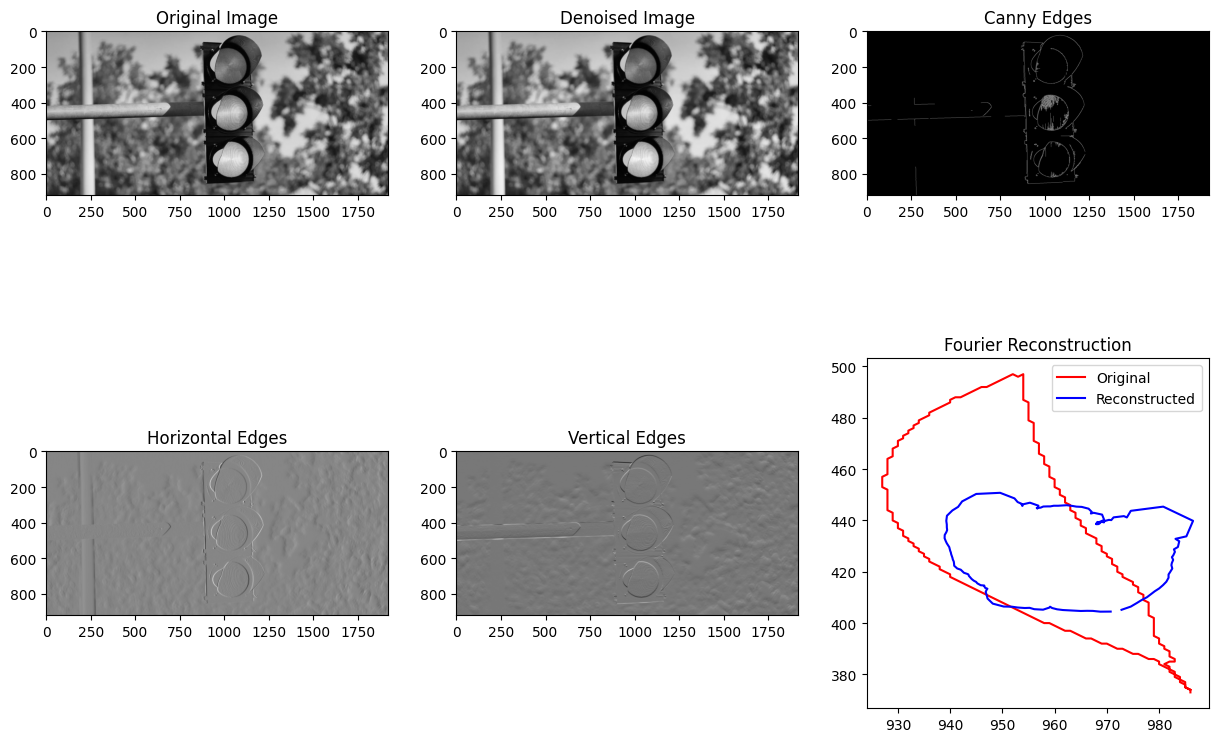

In [7]:
# Load and process image
image_path = "/content/led-traffic-lights.jpg" # Change this to your image path
image, denoised_image = load_and_denoise_image(image_path)

# Edge detection
edges_canny, sobelx, sobely, combined_edges = edge_detection(denoised_image)

# Fourier Transform on boundary points
fourier_coeffs, contour = fourier_transform_on_boundary(edges_canny)

# Reconstruct boundary using limited Fourier coefficients
reconstructed_x, reconstructed_y = reconstruct_boundary(fourier_coeffs, 50)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(denoised_image, cmap='gray')
axes[0, 1].set_title("Denoised Image")
axes[0, 2].imshow(edges_canny, cmap='gray')
axes[0, 2].set_title("Canny Edges")
axes[1, 0].imshow(sobelx, cmap='gray')
axes[1, 0].set_title("Horizontal Edges")
axes[1, 1].imshow(sobely, cmap='gray')
axes[1, 1].set_title("Vertical Edges")
axes[1, 2].plot(contour[:, 0], contour[:, 1], 'r', label='Original')
axes[1, 2].plot(reconstructed_x, reconstructed_y, 'b', label='Reconstructed')
axes[1, 2].legend()
axes[1, 2].set_title("Fourier Reconstruction")
plt.show()
